In [1]:
%%time
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split

syspathTraining = "D:/Python_all/ml_test/facebook-comment-volume-prediction-master/dataset/Training/"
fileTraining = ['Features_Variant_1.csv', 
                'Features_Variant_2.csv', 
                'Features_Variant_3.csv', 
                'Features_Variant_4.csv', 
                'Features_Variant_5.csv']
scaner = StandardScaler()

fullTraining = pd.concat(pd.read_csv(syspathTraining + file, index_col=False, header=None) for file in fileTraining)
# x = np.array(fullTraining.iloc[:,:-1])
x = fullTraining.iloc[:,:-1]
# y = np.array(fullTraining[53]).reshape(-1,1)
y = fullTraining.iloc[:,-1]

print(x.shape)
print(y.shape,end='\n\n')

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
len(x_train), len(x_test)



C:\Users\Руслан\AppData\Local\Programs\Python\Python37\Lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Руслан\AppData\Local\Programs\Python\Python37\Lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
(602813, 53)
(602813,)

Wall time: 3.8 s


(482250, 120563)

In [2]:
%%time
import copy
from sklearn.metrics import mean_squared_error
from math import sqrt

def MSE(xb,y,theta):
    return np.sum(np.square(xb.dot(theta)-y))/len(y)
# def RMSE():
    # return sqrt(mean_squared_error(y_test, regressor.predict(X_test)))

# Adding ones to the X matrix
xb = np.c_[np.ones((len(x),1)),x]

""
""
# # Standartized the X features
# xbStandartized = copy.deepcopy(xb)
# # save the shift and scaling
# mu = np.mean(xbStandartized[:,1:]) 
# sigma = np.std(xbStandartized[:,1:])
# # standardization
# xbStandartized[:,1:]=(xbStandartized[:,1:]-mu)/sigma
# # print(xbStandartized[:,:])
# print(xbStandartized.shape, '\n', mu, sigma, end='\n\n')
""
""
xbStandartized = scaner.fit_transform(copy.deepcopy(xb))
print(np.mean(xbStandartized[:,:]), np.std(xbStandartized[:,:]))

# Num of any samples
m = len(y) 
cost = []
learningRate = 0.0015
numIterations = 1000

# Random initialization with standard normal distribution -- randn(.,.)
theta = np.random.randn(54,1) 

# Start gradient descent Uuuf
for i in range(numIterations):
    gradient = 2/m * xbStandartized.T.dot(xbStandartized.dot(theta) - y) # dimension: (54,1)
    theta = theta - learningRate * gradient
    cost.append(MSE(xbStandartized,y,theta))
# print(theta, end='\n\n')
print('\n\n')

2.6197958922930902e-18 0.9813067629253173



Wall time: 1min 4s


Wall time: 266 ms


Text(0, 0.5, 'MSE')

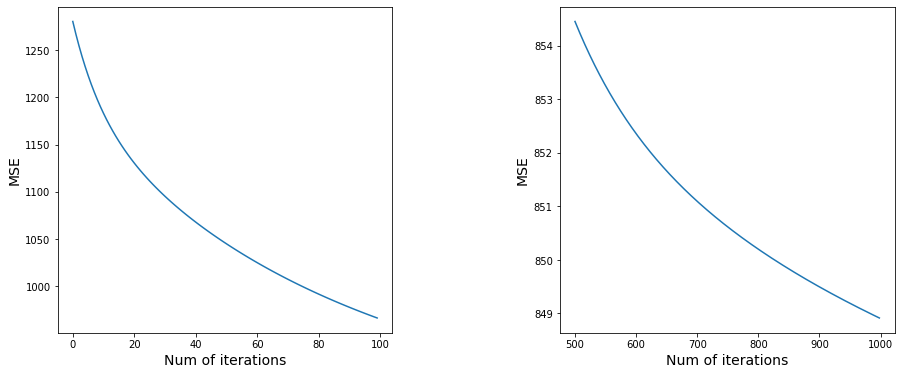

In [3]:
%%time
import matplotlib.pyplot as plt

# Out the MSE jumping over learning rate and iterations
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))

ax[0].plot(range(0,100), cost[0:100])
ax[1].plot(range(500,999), cost[500:999])
plt.subplots_adjust(wspace=0.5)

ax[0].set_xlabel('Num of iterations', fontsize = 14)
ax[1].set_xlabel('Num of iterations', fontsize = 14)
ax[0].set_ylabel('MSE', fontsize = 14)
ax[1].set_ylabel('MSE', fontsize = 14)


In [4]:
# # UnStandart:
# xFit = np.linspace(0,100, num = 200)
# # use the previously saved mean and standard deviation in def Standart()
# xFitStandard = (xFit - mu)/sigma 
# xFitStandardb = np.c_[np.ones((len(xFitStandard),1)), xFitStandard]
# yFit = xFitStandardb.dot(theta)
